In [137]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_venn import venn3, venn3_circles

def save_pkl(data, path):
    with open(path, 'wb') as f:
        pickle.dump(data, f)


def load_pkl(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)  # 단 한줄씩 읽어옴

    return data

In [138]:
file_name =os.listdir('./pkl')[:-3]

for i in range(0, len(file_name)):
    file_name[i] = os.path.join('./pkl', file_name[i])

In [139]:
file_name

["./pkl\\('airplane', 'automobile', 'bird')_airplane_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'bird')_automobile_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'bird')_bird_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'cat')_airplane_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'cat')_automobile_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'cat')_cat_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'deer')_airplane_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'deer')_automobile_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'deer')_deer_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'dog')_airplane_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'dog')_automobile_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'dog')_dog_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'frog')_airplane_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'frog')_automobile_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'frog')_frog_idx.pkl",
 "./pkl\\('airplane', 'automobile', 'horse')_airplane_idx.pkl",
 "./pkl\\

In [140]:
part = []

for i in range(0, len(file_name), 3):
    part.append(file_name[i:i+3])

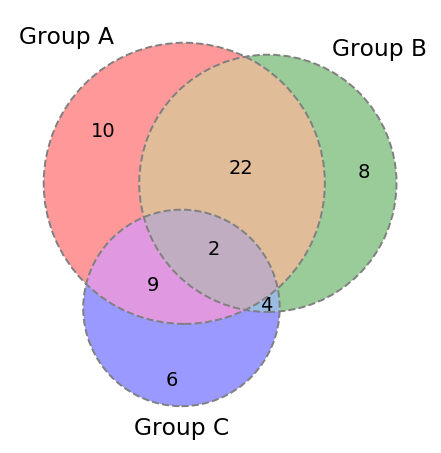

In [141]:
# Line style: can be 'dashed' or 'dotted' for example
v=venn3(subsets = (10, 8, 22, 6,9,4,2), set_labels = ('Group A', 'Group B', 'Group C'))
c=venn3_circles(subsets = (10, 8, 22, 6,9,4,2), linestyle='dashed', linewidth=1, color="grey")
plt.show()

Class 0 : airplane
Class 1 : automobile
Class 2 : bird


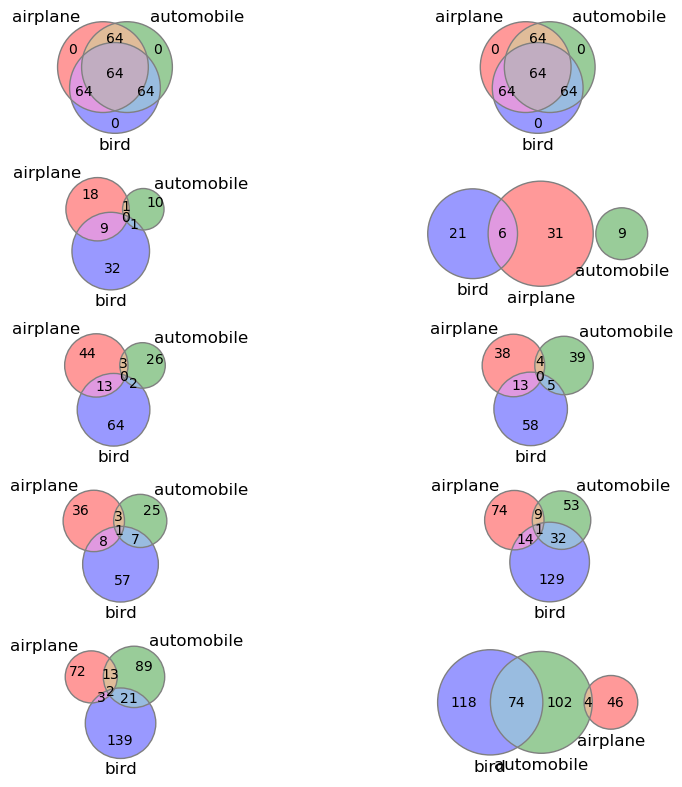

In [142]:
from matplotlib_venn import venn3, venn3_circles

my_dpi=100
origin = [64, 64, 128, 128, 256, 256, 512, 512, 512, 512]

for p in part:
    fig = plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

    cls_0_name = p[0].split('_')[-2]
    cls_1_name = p[1].split('_')[-2]
    cls_2_name = p[2].split('_')[-2]

    print(f"Class 0 : {cls_0_name}\nClass 1 : {cls_1_name}\nClass 2 : {cls_2_name}")

    cls_0_idx = load_pkl(p[0])
    cls_1_idx = load_pkl(p[1])
    cls_2_idx = load_pkl(p[2])
    

    for i, (c0, c1, c2, ori) in enumerate(zip(cls_0_idx, cls_1_idx, cls_2_idx, origin)):
        c0 = set(c0)
        c1 = set(c1)
        c2 = set(c2)
        
        v0 = len(c0 - c1 - c2)                         # only 0
        v1 = len(c1 - c0 - c2)                         # only 1
        v2 = len(c0.intersection(c1))                  # 0 and 1
        v3 = len(c2 - c0 - c1)                         # only 2
        v4 = len(c0.intersection(c2))                  # 0 and 2
        v5 = len(c1.intersection(c2))                  # 1 and 2
        v6 = len(c0.intersection(c1).intersection(c2)) # 0 and 1 and 2
        
        ax = fig.add_subplot(5, 2, i + 1)
        
        v=venn3(subsets = (v0, v1, v2, v3, v4, v5, v6), set_labels = (cls_0_name, cls_1_name, cls_2_name))
        c=venn3_circles(subsets = (v0, v1, v2, v3, v4, v5, v6), linestyle='-', linewidth=1, color="grey")
        ax.plot()
        
    break